# 线性回归
#### 线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。其表达形式为y = w'x+e，e为误差服从均值为0的正态分布。回归分析中，只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为一元线性回归分析。如果回归分析中包括两个或两个以上的自变量，且因变量和自变量之间是线性关系，则称为多元线性回归分析。

# 1、 多元线性回归
#### $h(x) = \theta_0*x_1+\theta_1*x_2+...+\theta_n*x_n$

In [1]:
from matplotlib import pyplot
from argparse import Namespace
import numpy as np
import pandas as pd
import random

In [2]:
# 参数
args=Namespace(
        seed=1234,
        num_samples=100,
        train_size=0.75,
        test_size=0.25,
        num_epochs=100,
)
np.random.seed(args.seed)

In [3]:
# 自己生成一些假数据应用在多元回归上
def generate_Polyomial_data(num_samples):
    X1 = np.random.randint(1,20,num_samples)
    X2 = np.random.randint(1,10,num_samples)
    y = 0.65*X1+9.38*X2+4.7
    return X1,X2,y

In [4]:
X1,X2,y = generate_Polyomial_data(args.num_samples)
data=np.vstack([X1,X2,y]).T
df= pd.DataFrame(data,columns=['X1','X2','y'])
df.head()

,X1,X2,y
0,16.0,7.0,80.76
1,7.0,9.0,93.67
2,13.0,5.0,60.05
3,16.0,9.0,99.52
4,18.0,2.0,35.16


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# 将数据集划分为两个组件 X 和 Y
X=df.iloc[:,0:2]
Y=df.iloc[:,2]
print(X)

      X1   X2
0   16.0  7.0
1    7.0  9.0
2   13.0  5.0
3   16.0  9.0
4   18.0  2.0
..   ...  ...
95  14.0  4.0
96   1.0  9.0
97   5.0  9.0
98   5.0  9.0
99   1.0  2.0

[100 rows x 2 columns]


In [7]:
# 划分数据到训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=args.test_size)
print ("X_train:", x_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", x_test.shape)
print ("y_test:", y_test.shape)

X_train: (75, 2)
y_train: (75,)
X_test: (25, 2)
y_test: (25,)


In [25]:
# 标准化训练集数据 (mean=0,std=1)

# standard=StandardScaler()
# # 在训练集和测试集上进行标准化操作
# standardized_X_train = standard.fit_transform(x_train)
# standardized_y_train = standard.fit_transform(y_train.values.reshape(-1,1)).ravel()
# standardized_X_test = standard.fit_transform(x_test)
# standardized_y_test = standard.fit_transform(y_test.values.reshape(-1,1)).ravel()

X_scaler=StandardScaler().fit(x_train)
y_scaler=StandardScaler().fit(y_train.values.reshape(-1,1))
# 在训练集和测试集上进行标准化操作
standardized_X_train = X_scaler.transform(x_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(x_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()


# 检查
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean 应该是 ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std 应该是 1

mean: [-7.99360578e-17  3.84877315e-17] 6.898185726337639e-16
std: [1. 1.] 1.0


### 一、使用sklearn中的LinearRegression()进行回归

In [32]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X=x_train,y=y_train)
# pred_train=(linear.predict(x_train) * np.sqrt(y_scaler.var_))+y_scaler.mean_
pred_train = linear.predict(x_train)
print("pred_train",pred_train)
print("y_train",y_train)

pred_train [54.57 92.09 51.32 86.89 38.04 52.62 95.62 92.09 80.11 25.13 97.57 20.58
 83.64 89.77 86.24 36.09 24.11 36.74 80.76 43.24 43.89 37.39 81.69 47.42
 60.05 98.22 24.11 72.96 92.37 59.4  52.62 32.56 85.59 84.29 53.55 53.92
 19.28 25.13 35.16 36.74 96.92 27.36 70.08 67.48 28.66 33.21 31.26 91.44
 47.42 48.72 51.97 21.88 51.97 74.91 36.74 15.38 33.86 35.81 95.62 62.65
 62.   80.39 50.67 60.05 81.04 93.67 34.79 93.02 35.81 86.89 33.21 78.81
 25.13 84.94 24.11]
y_train 80    54.57
13    92.09
95    51.32
35    86.89
84    38.04
      ...  
33    33.21
41    78.81
8     25.13
60    84.94
99    24.11
Name: y, Length: 75, dtype: float64


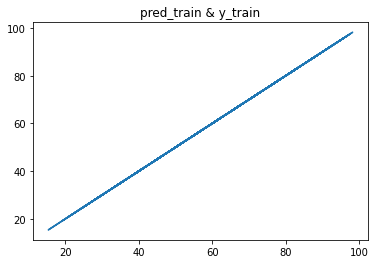

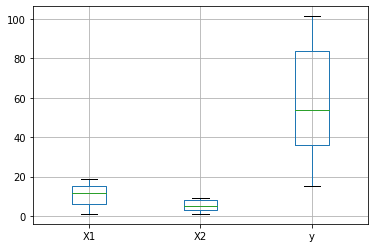

In [33]:
from matplotlib import pyplot as plt
plt.title('pred_train & y_train')
plt.plot(pred_train,y_train)
plt.show()
# sym='r*':表示异常点的形状
df.boxplot(sym='r*')
plt.show()

In [34]:
pred_test=linear.predict(x_test)
print('pred_test',pred_test)
print('y_test',y_test)

pred_test [ 91.72  67.48  15.38  58.1   53.92  61.35  53.55  69.43  41.29  92.37
  54.2   53.92  64.23  36.09  91.07 101.47  91.72  40.64  61.63  22.53
  31.26  50.02  99.52 100.82  63.3 ]
y_test 26     91.72
94     67.48
79     15.38
89     58.10
32     53.92
37     61.35
27     53.55
49     69.43
7      41.29
98     92.37
19     54.20
85     53.92
83     64.23
61     36.09
78     91.07
71    101.47
92     91.72
21     40.64
22     61.63
28     22.53
30     31.26
36     50.02
3      99.52
43    100.82
38     63.30
Name: y, dtype: float64


In [35]:
# 自定义输入
X_infer=pd.DataFrame(np.arange(8).reshape(4,2),columns=['X1','X2'])
print(X_infer)
y_infer=[0.65*x1+9.38*x2+4.7 for x1,x2 in X_infer.values]
print(y_infer)
pred_infer=linear.predict(X_infer)
print(pred_infer)
plt.show()

   X1  X2
0   0   1
1   2   3
2   4   5
3   6   7
[14.080000000000002, 34.14, 54.20000000000001, 74.26000000000002]
[14.08 34.14 54.2  74.26]


In [36]:
# 评估回归效果
train_mse=np.mean(y_train-pred_train)**2
test_mse=np.mean(y_test-pred_test)**2
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 0.00, test_MSE: 0.00


In [37]:
coef=linear.coef_
intercept=linear.intercept_
score=linear.score(X,Y)
print('coef',coef)
print('intercept',intercept)
print('score',score)

coef [0.65 9.38]
intercept 4.699999999999989
score 1.0


### 二、使用SGDRegression()回归

In [38]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(loss='squared_loss',penalty='none',max_iter=args.num_epochs)
sgd.fit(X=standardized_X_train,y=standardized_y_train)

SGDRegressor(max_iter=100, penalty='none')

In [39]:
# 预测 (还未标准化)
# pred_train = (sgd.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
# pred_test = (sgd.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

pred_train = sgd.predict(standardized_X_train)
pred_test = sgd.predict(standardized_X_test)

In [40]:
# 评估
# 训练集和测试集上的误差 MSE
train_mse=np.mean(y_train-pred_train)**2
test_mse=np.mean(y_test-pred_test)**2
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 3304.56, test_MSE: 3904.03


In [41]:
# 传入自定义的输入值
X_infer=pd.DataFrame(np.arange(6).reshape(3,2),columns=['X1','X2'])
y_infer=[0.65*x1+9.38*x2+4.7 for x1,x2 in X_infer.values]
print(y_infer)
pred_infer=linear.predict(X_infer)
print(pred_infer)

[14.080000000000002, 34.14, 54.20000000000001]
[14.08 34.14 54.2 ]


In [42]:
# 可解释性
coef=linear.coef_
intercept=linear.intercept_
score=linear.score(X,Y)
print('coef',coef)
print('intercept',intercept)
print('score',score)

coef [0.65 9.38]
intercept 4.699999999999989
score 1.0


### 三、带有正则化的SGDRegression()回归

In [43]:
# alpha:乘以正则化的常数
l2_sgd=SGDRegressor(loss='squared_loss',penalty='l2',max_iter=args.num_epochs,alpha=1e-2)
print('X_train,standardized_X_train',x_train,standardized_X_train)
l2_sgd.fit(X=standardized_X_train,y=standardized_y_train)

X_train,standardized_X_train       X1   X2
80  19.0  4.0
13  19.0  8.0
95  14.0  4.0
35  11.0  8.0
84   8.0  3.0
..   ...  ...
33  15.0  2.0
41  13.0  7.0
8   17.0  1.0
60   8.0  8.0
99   1.0  2.0

[75 rows x 2 columns] [[ 1.5211314  -0.32264678]
 [ 1.5211314   1.1439295 ]
 [ 0.59511797 -0.32264678]
 [ 0.03950991  1.1439295 ]
 [-0.51609816 -0.68929085]
 [ 0.96552334 -0.32264678]
 [-0.14569278  1.51057357]
 [ 1.5211314   1.1439295 ]
 [ 0.78032066  0.77728543]
 [ 1.15072603 -1.422579  ]
 [ 0.40991528  1.51057357]
 [-0.14569278 -1.422579  ]
 [-0.88650353  1.1439295 ]
 [-1.81251697  1.51057357]
 [-0.14569278  1.1439295 ]
 [-1.07170622 -0.68929085]
 [-1.81251697 -1.05593493]
 [-0.88650353 -0.68929085]
 [ 0.96552334  0.77728543]
 [ 0.96552334 -0.68929085]
 [ 1.15072603 -0.68929085]
 [-0.70130084 -0.68929085]
 [-1.44211159  1.1439295 ]
 [-0.51609816 -0.32264678]
 [ 0.40991528  0.04399729]
 [ 0.59511797  1.51057357]
 [-1.81251697 -1.05593493]
 [-1.2569089   0.77728543]
 [-1.07170622  1.5105735

SGDRegressor(alpha=0.01, max_iter=100)

In [44]:
# 预测 (还未标准化)
pred_train = (l2_sgd.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (l2_sgd.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [45]:
# 训练集和测试集的MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(
    train_mse, test_mse))

train_MSE: 2.13, test_MSE: 2.20


In [46]:
# 未标准化系数
coef = l2_sgd.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = l2_sgd.intercept_ * y_scaler.scale_ + y_scaler.mean_ - (coef*X_scaler.mean_)
print (coef) 
print (intercept) 

[0.52676404 8.86869522]
[51.82463415 14.22742957]


# 2、多项式回归
#### 类似于$h(x)=a*x^2+b*x+c$

In [47]:
from matplotlib import pyplot as plt
from argparse import Namespace
import numpy as np
import pandas as pd

In [48]:
# 参数
args=Namespace(
        seed=1234,
        num_samples=100,
        train_size=0.75,
        test_size=0.25,
        num_epochs=100,
)
np.random.seed(args.seed)

In [49]:
x=[1,3,5,8,6,4,12,17,40,23,30,48,56,34,23]
y=[3,4,12,23,15,11,23,34,68,67,78,88,99,51,40]
data=np.vstack([x,y]).T
df=pd.DataFrame(data,columns=['x','y'])
print(df.head(10))

    x   y
0   1   3
1   3   4
2   5  12
3   8  23
4   6  15
5   4  11
6  12  23
7  17  34
8  40  68
9  23  67


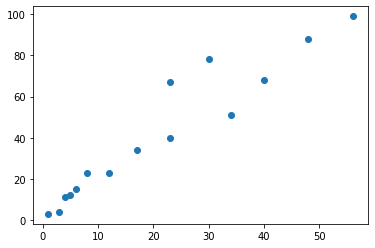

In [50]:
# plt绘制x与y的关系
plt.scatter(df['x'],df['y'])
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [52]:
# 划分训练数据集
X_train,X_test,y_train,y_test=train_test_split(df['x'].values.reshape(-1,1),df['y'],test_size=args.test_size)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (11, 1)
y_train: (11,)
X_test: (4, 1)
y_test: (4,)


In [53]:
# 实例化一个二次多项式特征实例
from sklearn.preprocessing import PolynomialFeatures
ploy2 = PolynomialFeatures(degree=2)
ploy3 = PolynomialFeatures(degree=3)
ploy4 = PolynomialFeatures(degree=4)

# 用二次多项式对样本X值做变换
ploy2_X_train = ploy2.fit_transform(X_train)
ploy2_X_test = ploy2.transform(X_test)

# 用三次多项式对样本X值做变换
ploy3_X_train = ploy3.fit_transform(X_train)
ploy3_X_test = ploy3.transform(X_test)

# 用三次多项式对样本X值做变换
ploy4_X_train = ploy4.fit_transform(X_train)
ploy4_X_test = ploy4.transform(X_test)

### 使用LinearRegression()进行回归预测

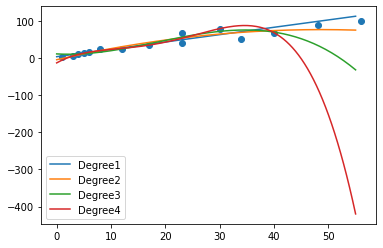

In [54]:
# 1次线性回归预测
ply1_lr=LinearRegression()
ply1_lr.fit(X_train,y_train)
pred_test_1=ply1_lr.predict(X_test)

# 2次线性回归预测
ply2_lr=LinearRegression()
ply2_lr.fit(ploy2_X_train,y_train)
pred_test_2=ply2_lr.predict(ploy2_X_test)

# 3次线性回归预测
ply3_lr=LinearRegression()
ply3_lr.fit(ploy3_X_train,y_train)
pred_test_3=ply3_lr.predict(ploy3_X_test)

# 4次线性回归预测
ply4_lr=LinearRegression()
ply4_lr.fit(ploy4_X_train,y_train)
pred_test_4=ply4_lr.predict(ploy4_X_test)

xx = np.linspace(0, 55, 200)   # 0到16均匀采集100个点做x轴
xx = xx.reshape(xx.shape[0], 1)

yy_poly1 = ply1_lr.predict(xx)

xx_poly2 = ploy2.transform(xx)
yy_poly2 = ply2_lr.predict(xx_poly2)

xx_poly3 = ploy3.transform(xx)
yy_poly3 = ply3_lr.predict(xx_poly3)

xx_poly4 = ploy4.transform(xx)
yy_poly4 = ply4_lr.predict(xx_poly4)

plt.scatter(x,y)
plt.plot(xx,yy_poly1,label='Degree1')
plt.plot(xx,yy_poly2,label='Degree2')
plt.plot(xx,yy_poly3,label='Degree3')
plt.plot(xx,yy_poly4,label='Degree4')

plt.legend()
plt.show()

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.89473684e+00 8.37950139e+00]
 [1.00000000e+00 5.78947368e+00 3.35180055e+01]
 [1.00000000e+00 8.68421053e+00 7.54155125e+01]
 [1.00000000e+00 1.15789474e+01 1.34072022e+02]
 [1.00000000e+00 1.44736842e+01 2.09487535e+02]
 [1.00000000e+00 1.73684211e+01 3.01662050e+02]
 [1.00000000e+00 2.02631579e+01 4.10595568e+02]
 [1.00000000e+00 2.31578947e+01 5.36288089e+02]
 [1.00000000e+00 2.60526316e+01 6.78739612e+02]
 [1.00000000e+00 2.89473684e+01 8.37950139e+02]
 [1.00000000e+00 3.18421053e+01 1.01391967e+03]
 [1.00000000e+00 3.47368421e+01 1.20664820e+03]
 [1.00000000e+00 3.76315789e+01 1.41613573e+03]
 [1.00000000e+00 4.05263158e+01 1.64238227e+03]
 [1.00000000e+00 4.34210526e+01 1.88538781e+03]
 [1.00000000e+00 4.63157895e+01 2.14515235e+03]
 [1.00000000e+00 4.92105263e+01 2.42167590e+03]
 [1.00000000e+00 5.21052632e+01 2.71495845e+03]
 [1.00000000e+00 5.50000000e+01 3.02500000e+03]]
[-4.81175414  4.54546674 13.3289135  21

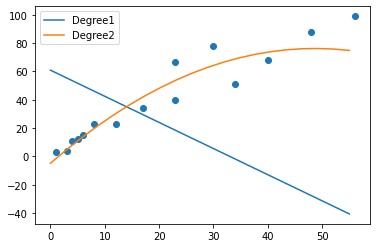

In [55]:
# 1次线性回归预测
ply1_sgd=SGDRegressor(loss='squared_loss',penalty='l2',max_iter=args.num_epochs)
ply1_sgd.fit(X_train,y_train)
pred_test_1=ply1_sgd.predict(X_test)
# print(X_test)
# print('y_test',y_test)
# print('pred_test:\n',pred_test)

# 2次线性回归预测
ply2_sgd=LinearRegression()
# print(ploy2_X_train)
# print(y_train)
ply2_sgd.fit(ploy2_X_train,y_train)
pred_test_2=ply2_sgd.predict(ploy2_X_test)

# 3次线性回归预测
ply3_sgd=SGDRegressor(loss='squared_loss',penalty='l2',max_iter=args.num_epochs)
ply3_sgd.fit(ploy3_X_train,y_train)
pred_test_3=ply3_sgd.predict(ploy3_X_test)

# 4次线性回归预测
ply4_sgd=SGDRegressor(loss='squared_loss',penalty='l2',max_iter=args.num_epochs)
ply4_sgd.fit(ploy4_X_train,y_train)
pred_test_4=ply4_sgd.predict(ploy4_X_test)

xx = np.linspace(0, 55, 20)   # 0到16均匀采集100个点做x轴
xx = xx.reshape(xx.shape[0], 1)


yy_poly1 = ply1_sgd.predict(xx)
# print(xx)
# print(yy_poly1)

xx_poly2 = ploy2.transform(xx)
print(xx_poly2)
yy_poly2 = ply2_sgd.predict(xx_poly2)
print(yy_poly2)
xx_poly3 = ploy3.transform(xx)
yy_poly3 = ply3_sgd.predict(xx_poly3)

xx_poly4 = ploy4.transform(xx)
yy_poly4 = ply4_sgd.predict(xx_poly4)

plt.scatter(x,y)
plt.plot(xx,yy_poly1,label='Degree1')
plt.plot(xx,yy_poly2,label='Degree2')
# plt.plot(xx,yy_poly3,label='Degree3')
# plt.plot(xx,yy_poly4,label='Degree4')

plt.legend()
plt.show()

pred_test [205.77729084 299.56618741 -15.2965368  353.15984259]
y_test 13    51
11    88
0      3
12    99
Name: y, dtype: int64
coef [6.6992069]
intercept [-21.99574369]


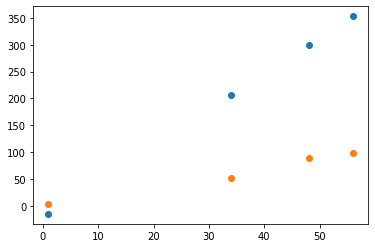

In [56]:
sgd=SGDRegressor(loss="squared_loss", penalty="none", max_iter=args.num_epochs)
sgd.fit(X_train,y_train)
# 预测 (还未标准化)
pred_test=sgd.predict(X_test)

print('pred_test',pred_test)
print('y_test',y_test)

coef=sgd.coef_
intercept=sgd.intercept_
print('coef',coef)
print('intercept',intercept)
plt.scatter(X_test,pred_test)
plt.scatter(X_test,y_test)
plt.show()


## 实验证明：对于多项式的回归来说，SGDRegression()的效果不如LinearRegression()